# First Deep Dive on Enrollment Counts
### Sheng Liu
### Monday, Nov.  7, 2016

In [290]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
data = pd.read_csv('1001_project/CSD20_Resident_Data_Phase_1.csv', header = 0, sep = ',')#, index_col = 0)

In [291]:
year = []
for i in range(len(data)):
    year.append(str(data['School_Year'].iloc[i])[0:4])
for i in range(len(year)):
    year[i] = int(year[i])
data['Year'] = year

In [21]:
data_5 = data[data['Grade_Level']== '5']
dic_5 = {}
for year in np.unique(data_5.Year.values):
    
    dic_5 ={}
    

array([2004, 2008, 2001, ..., 2003, 2003, 2007])

In [46]:
data_5 = data[data['Grade_Level']== '5']

In [47]:
data_5.head()

,Census_Tract,School_Year,Grade_Level,no_Students,Year
6,18,20042005,5,1,2004
11,18,20082009,5,1,2008
17,20,20012002,5,7,2001
23,20,20022003,5,6,2002
29,20,20032004,5,2,2003


In [54]:
data_5_groupby_YEAR_AND_TRACT = data_5.groupby(['Census_Tract','Year'])['no_Students'].count()

In [292]:
def DEL_MISSINGVALUES(mat):
    mat_without_missing = []
    for row in mat:
        if -999 not in row:
            mat_without_missing.append(row)
    return mat_without_missing

In [293]:

def CALCU_MAT(df):
    mat = []
    for i in np.unique(data.Census_Tract.values):
        if i in np.unique(df.Census_Tract.values):
            tract_slice_data = df[df['Census_Tract'] == i]
            vec = []
            for j in [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]:
                if j in tract_slice_data.Year.values:
                    m = tract_slice_data[tract_slice_data['Year'] == j].no_Students.values
                    vec.append(int(m))
                else:
                    vec.append(-999)
            mat.append(vec)
        else:
            mat.append([0]*10)
            #mat = DEL_MISSINGVALUES(mat)
    return mat
    


In [249]:
data_4 = data[data['Grade_Level']== '4']
mat_4 = CALCU_MAT(data_4)
data_5 = data[data['Grade_Level']== '5']
mat_5 = CALCU_MAT(data_5)

In [250]:
list_2002_G5 = [x[1] for x in mat_5]
list_2001_G4 = [x[0] for x in mat_4]


In [294]:
def clean_list(m,n):
    m_new = []
    n_new = []
    for i in range(len(m)):
        if m[i] != 0 and m[i] !=-999 and n[i] != 0 and n[i] != -999:
            m_new.append(m[i])
            n_new.append(n[i])
    return m_new, n_new

In [295]:
list_2001_G4_new, list_2002_G5_new = clean_list(list_2001_G4,list_2002_G5)

In [285]:
len(list_2001_G4_new) - len(list_2002_G5_new)

0

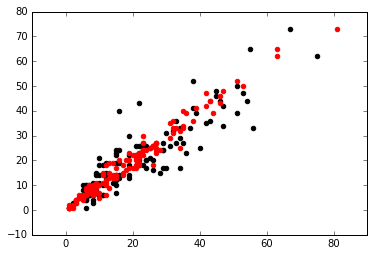

In [297]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(list1,list2,color = 'black')
plt.scatter(list_2001_G4_new, list_2002_G5_new,color = 'red')
#plt.xlim([0,100])
#plt.ylim([0,100])

In [323]:
correlation_vec = []
k = 0
for grade in ['K','1','2','3','4','5']:
    k = k+1
    if k < 6:
        data_slice_grade_this_year = data[data['Grade_Level']== grade]
        mat_this_year = CALCU_MAT(data_slice_grade_this_year)
        data_slice_grade_next_year = data[data['Grade_Level']== str(k) ]
        mat_next_year = CALCU_MAT(data_slice_grade_next_year)
        for year in range(0,10,2):
            for x in mat_next_year:
                list_next_year.append(x[year])
        for year in range(1,10,2):
            for x in mat_this_year:
                list_this_year.append(x[year])
        #list_next_year = [x[4] for x in mat_next_year]
        #list_this_year = [x[5] for x in mat_this_year]
        list_this_year, list_next_year = clean_list(list_this_year,list_next_year)
        correlation_vec.append(np.corrcoef(list_this_year, list_next_year)[0][1])

In [324]:
correlation_vec

[0.9156514081924243,
 0.91585486436884989,
 0.91339009012734562,
 0.91293281766380663,
 0.91203186375719181]

In [319]:
correlation_vec_same_grade = []
k = 0
list_next_year = []
list_this_year = []
for grade in ['K','1','2','3','4','5']:
    k = k+1
    if k < 6:
        data_slice_grade_this_year = data[data['Grade_Level']== grade]
        mat_this_year = CALCU_MAT(data_slice_grade_this_year)
        data_slice_grade_next_year = data[data['Grade_Level']== grade ]
        mat_next_year = CALCU_MAT(data_slice_grade_next_year)
        for year in range(0,10,2):
            for x in mat_next_year:
                list_next_year.append(x[year])
        for year in range(1,10,2):
            for x in mat_this_year:
                list_this_year.append(x[year])
        #list_next_year = [x[4] for x in mat_next_year]
        #list_this_year = [x[5] for x in mat_this_year]
        list_this_year, list_next_year = clean_list(list_this_year,list_next_year)
        correlation_vec_same_grade.append(np.corrcoef(list_this_year, list_next_year)[0][1])

3166

In [318]:
mat_this_year

[[-999, -999, 1, -999, 1, -999, 1, -999, -999, -999],
 [8, 3, 3, 7, 5, 4, 11, 7, 9, 5],
 [47, 51, 54, 52, 40, 47, 36, 50, 42, 44],
 [17, 18, 14, 10, 17, 13, 12, 20, 7, 16],
 [9, 19, 17, 18, 14, 14, 22, 22, 27, 27],
 [19, 29, 33, 42, 25, 27, 21, 19, 12, 21],
 [9, 6, 7, 7, 9, 6, 2, 4, 4, 8],
 [13, 12, 11, 10, 15, 12, 6, 7, 10, 7],
 [3, 3, 3, 3, 7, 2, 5, 4, 8, 9],
 [6, 4, 17, 9, 11, 6, 7, 4, 15, 20],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [13, 8, 15, 8, 6, 11, 2, 7, 5, 3],
 [8, 14, 13, 8, 10, 14, 7, 6, 11, 8],
 [14, 13, 15, 27, 10, 19, 13, 7, 24, 30],
 [22, 30, 27, 28, 19, 11, 15, 12, 29, 32],
 [21, 27, 30, 31, 21, 18, 15, 16, 35, 34],
 [18, 22, 31, 36, 36, 27, 26, 18, 29, 24],
 [42, 71, 62, 51, 52, 63, 51, 74, 62, 55],
 [13, 13, 20, 15, 18, 18, 15, 14, 11, 18],
 [19, 25, 38, 20, 22, 16, 26, 24, 22, 21],
 [63, 72, 75, 89, 72, 78, 61, 73, 86, 82],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [34, 30, 36, 43, 42, 30, 42, 35, 27, 28],
 [1, -999, -999, -999, -999, -999, -999, -999, -999, -999],
 [0, 0, 0, 0,

In [310]:
correlation_vec_same_grade

[0.92791569283329478,
 0.91807606156151278,
 0.92152832535696716,
 0.90724231600851235,
 0.90353480087068461]

In [325]:
from plotly.graph_objs import *
py.sign_in('JeremyHide', '7w9xyknix4')
trace1 = Scatter(
x = [0,1,2,3,4],
y = correlation_vec,
name='Previous Grade'
)
trace2 = Scatter(
x = [0,1,2,3,4],
y = correlation_vec_same_grade,
name='Same Grade'
)
corr_line_chart = Data([trace1,trace2])
layout = Layout(
    #title='',
    xaxis=XAxis(
        title='Grade',
        titlefont=dict(
            color='#7f7f7f'
        )
    ),
    yaxis=YAxis(
        title='Correlation with Next Year Enrollment',
        titlefont=dict(
            color='#7f7f7f'
        )
    )
)
fig = Figure(data=corr_line_chart, layout=layout)
plot_url = py.plot(fig)

In [228]:
def clean_list(m,n):
    m_new = []
    n_new = []
    for i in range(len(m)):
        if m[i] != 0 and m[i] !=-999 and n[i] != 0 and n[i] != -999:
            m_new.append(m[i])
            n_new.append(n[i])
    return m_new, n_new

m , n =clean_list(list_2001_G4,list_2002_G5)        

In [235]:
len(list_2001_G4_new) - len(list_2005_G5_new )

0

In [261]:
np.corrcoef(list_2001_G4, list_2002_G5)[0][1]

0.77844797115841169

In [252]:
len(list_2001_G4)

157

In [256]:
data[data['Grade_Level']== '3']

,Census_Tract,School_Year,Grade_Level,no_Students,Year
1,18,20022003,3,1,2002
3,18,20032004,3,1,2003
9,18,20062007,3,1,2006
15,20,20012002,3,5,2001
21,20,20022003,3,2,2002
27,20,20032004,3,8,2003
33,20,20042005,3,5,2004
39,20,20052006,3,5,2005
45,20,20062007,3,9,2006
51,20,20072008,3,6,2007


In [257]:
range('0','6')

TypeError: 'str' object cannot be interpreted as an integer